**HR Attrition Analysis**

**Part 1 : Exploration Data Analysis (EDA)**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

blue_color =  '#7F7FFF'
red_color = '#BF3F7F'
green_color = '#9ACD32'

In [3]:
data = pd.read_csv('/Users/hazmanhafiz/Desktop/HR Attrition Analysis/HR_comma_sep.csv')

print("Number of rows: {}".format(data.shape[0]))
print("Number of columns: {}\n".format(data.shape[1]))

print("Column Names:")
print("----------------")
for col in data.columns:
    print(col+" ("+str(data[col].dtype)+")")
print("----------------\n")

print("Any NaN values in data: " + str(data.isnull().values.any()))

data.head()

Number of rows: 14999
Number of columns: 10

Column Names:
----------------
satisfaction_level (float64)
last_evaluation (float64)
number_project (int64)
average_montly_hours (int64)
time_spend_company (int64)
Work_accident (int64)
left (int64)
promotion_last_5years (int64)
sales (object)
salary (object)
----------------

Any NaN values in data: False


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#replacing the mispelled 'sales' with 'department'
data=data.rename(columns = {'sales':'department'})
#consistent usage of lower case for the colyumns
data.columns = [x.lower() for x in data.columns]

data['left'] = data['left'].astype('str')
data['work_accident'] = data['work_accident'].astype('str')
data['promotion_last_5years'] = data['promotion_last_5years'].astype('str')

print("Column Names:")
print("----------------")
for col in data.columns:
    print(col+" ("+str(data[col].dtype)+")")
print("----------------")

data.head(10)

Column Names:
----------------
satisfaction_level (float64)
last_evaluation (float64)
number_project (int64)
average_montly_hours (int64)
time_spend_company (int64)
work_accident (object)
left (object)
promotion_last_5years (object)
department (object)
salary (object)
----------------


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


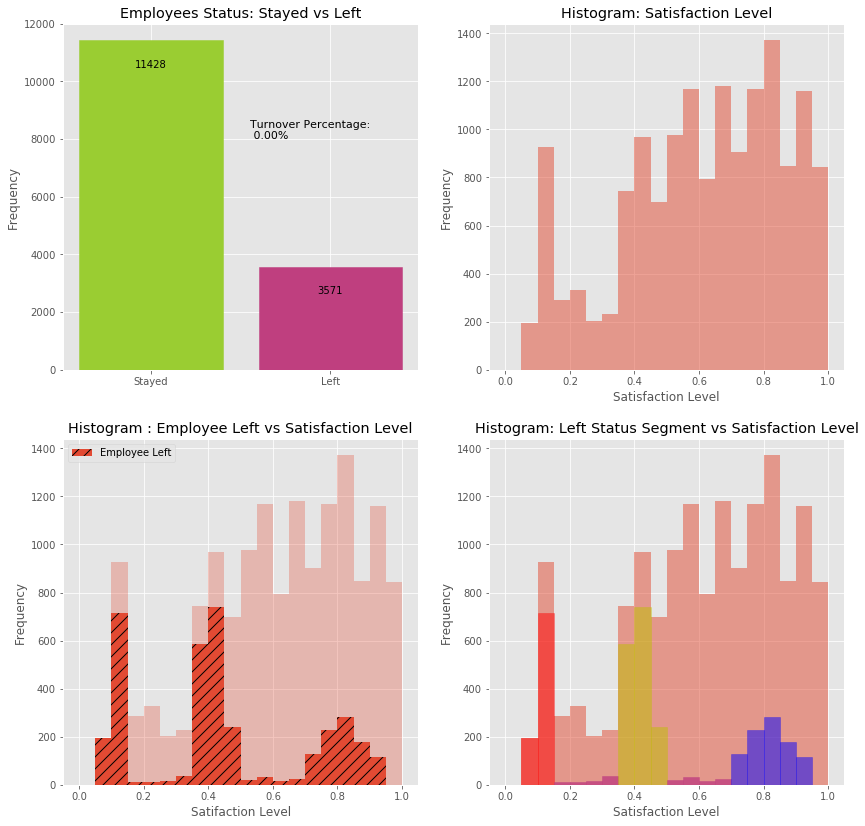

0
0
0
0


In [5]:
import copy

f, ax = plt.subplots(2,2,figsize=(14,14))

(ax1, ax2, ax3, ax4) = ax.flatten()

##########################################################
# Bar Chart of Left Column
left_count = data['left'].value_counts()
left_indices = left_count.index.tolist()
left_values = left_count.values.tolist()

if (left_indices[0] == '1'):
    left_indices[0] = 'Left'
    left_indices[1] = 'Stayed'
else:
    left_indices[0] = 'Stayed'
    left_indices[1] = 'Left'
    
y_pos = np.arange(len(left_values))    
bars=ax1.bar(y_pos, left_values, align='center')

bars[0].set_color(green_color)
bars[1].set_color(red_color)

# Add counts on Bars
def autolabel(rects):
    for rect in rects:
        ax1.text(rect.get_x() + rect.get_width()/2.,
                rect.get_y() + rect.get_height()-1000,
                '%d' % int(rect.get_height()),
                ha='center', va='bottom')
autolabel(bars)

# Add Text showing percentage of employees who left
emp_left = left_values[1]
perc_left = emp_left/sum(left_values) * 100
ax1.text(0.55, 8000, "Turnover Percentage:\n {:.2f}%".format(perc_left), fontsize=11)

ax1.set_xticks(y_pos)
ax1.set_xticklabels(left_indices)
ax1.set_ylabel('Frequency')
ax1.set_title('Employees Status: Stayed vs Left')

####################################################
#Histogram of Satisfaction Level : 20 bins in range (0-1), alpha - 0.5 represents opacity
ax2.hist(data['satisfaction_level'], bins=20, range =(0,1), alpha=0.5)
ax2.set_title('Histogram: Satisfaction Level')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Satisfaction Level')

#####################################################

n, bins, patches = ax3.hist(data['satisfaction_level'], bins=20, range=(0,1), alpha=0.3)
##
left_in_bins=[]
for i in range(len(bins)-1):
    start=bins[i]
    end=bins[i+1]
    
    left_emp=len(data.loc[(data['satisfaction_level']>=start)&(data['satisfaction_level']<end)&(data['left']=='1')])
    left_in_bins.append(left_emp)

index=0
for_legend=None
for p in patches:
    patch=copy.copy(p)
    patch.set_height(left_in_bins[index])
    #patch.set_color(red_color)
    patch.set_hatch('//')
    patch.set_alpha(1.0)
    ax3.add_patch(patch)
    if index==1:
        for_legend=patch
    index = index + 1
ax3.set_title('Histogram : Employee Left vs Satisfaction Level')
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Satifaction Level')
ax3.legend([for_legend],['Employee Left'])

###############################################

n,bins, patches = ax4.hist(data['satisfaction_level'], bins=20, range=(0,1), alpha =0.5)
##
left_in_bins=[]
for i in range(len(bins)-1):
    start=bins[i]
    end=bins[i+1]
    
    left_emp=len(data.loc[(data['satisfaction_level']>=start)&(data['satisfaction_level']<end)&(data['left']=='1')])
    left_in_bins.append(left_emp)

index=0
for p in patches:
    patch=copy.copy(p)
    patch.set_height(left_in_bins[index])
    if index in range(3):
        patch.set_color('r')
    elif index in range(7,10):
        patch.set_color('y')
    elif index in range(14,20):
        patch.set_color('b')
    
    else:
        patch.set_color(red_color)
        patch.set_alpha(0.8)
    ax4.add_patch(patch)
    index=index+1
ax4.set_title('Histogram: Left Status Segment vs Satisfaction Level')
ax4.set_xlabel('Satisfaction Level')
ax4.set_ylabel('Frequency')

plt.show()

seg_one_left=sum(left_in_bins[0:3])
print((seg_one_left/emp_left)*100)

seg_two_left=sum(left_in_bins[7:10])
print((seg_two_left/emp_left)*100)

seg_three_left=sum(left_in_bins[14:20])
print((seg_three_left/emp_left)*100)

sum_perc=((seg_one_left+seg_two_left+seg_three_left)/emp_left)*100
print(sum_perc)
    

**Findings on the analysis performed:**

1. The attrition rate 